 # *City Expansion Profit Predictor*

**Introduction**

The "City Expansion Profit Predictor" project aims to identify potential cities for opening new restaurant outlets within our franchise. As the demand for dining experiences continues to rise, strategic expansion into cities with favorable demographics is crucial for maximizing profitability.:

By leveraging data on existing restaurant profits and populations, along with candidate cities' population metrics, we can uncover insights that inform our expansion strategy. This analysis will not only highlight cities with high profit potential but also guide decision-making processes to ensure that our investments yield the highest returns.

Through data-driven methodologies, the City Expansion Profit Predictor will evaluate candidate cities and recommend optimal locations for new outlets, ultimately enhancing our franchise's growth and success in the competitive restaurant industry.















In [2]:
# Required Libraries for City Expansion Profit Predictor

# 1. Pandas
import pandas as pd
# Purpose: Data manipulation and analysis
# Usage: Loading CSV files, merging datasets, and performing data analysis

# 2. NumPy
import numpy as np
# Purpose: Numerical operations and calculations
# Usage: Handling numerical data and performing mathematical functions

# 3. Matplotlib
import matplotlib.pyplot as plt
# Purpose: Data visualization
# Usage: Creating plots and charts to visualize profit potential
%matplotlib inline

# 6. Copy
import copy
# Purpose: Create shallow or deep copies of objects
# Usage: Managing copies of data structures without affecting the original

# 7. Math
import math
# Purpose: Mathematical functions
# Usage: Performing mathematical calculations such as square roots, logarithms, etc.

# 8. Seaborn
import seaborn as sns
# Purpose: Advanced visualizations.
# Usage: Enhancing the aesthetics of your plots with statistical graphics.

# *Loading CSV Files*

**We will load the CSV files containing data on existing restaurant profits and candidate cities' populations using the Pandas library. This data will be essential for analyzing potential cities for new restaurant openings.**

In [3]:
city_profit_data_df = pd.read_csv(r"C:\Users\user\Downloads\City Expansion Profit Predictor\large_city_population_profit.csv", encoding="UTF-8")

In [4]:
# checking only 5 values
city_profit_data_df.head(5)

,Population,Profit
0,11.427457,11.148771
1,14.588598,2.827090
2,12.452504,12.845148
3,11.352780,19.264214
4,9.049441,-0.729803


In [5]:
# now info about the data frame
city_profit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  1000 non-null   float64
 1   Profit      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


**The variable `x_train`** is derived from the city population `Population` *column* data obtained from the CSV file, where each value is a decimal greater than zero and scaled by a factor of 10,000. For example, a value of **6.1101** indicates that the population for that city is **61,101**.

**The variable `y_train`** represents the average monthly profits of the restaurant in each city, also sourced from the `Profit` *column* CSV file. This data contains decimal values, some of which are negative. Positive values indicate profits in units of $10,000 (e.g., **17.592** represents **$175,920**), while negative values indicate losses (e.g., **-2.6807** represents a loss of **$26,807**).


In [6]:
x_train = city_profit_data_df['Population']  # taking the variable x_train
y_train = city_profit_data_df['Profit']  # taking the variable y_train

In [7]:
print ('Number of training examples (m):', len(x_train)) # we can do also y_train(target)

Number of training examples (m): 1000


#### **Visualize data**

**It is often useful to understand the data by visualizing it** .
- **For this dataset, you can use a scatter plot to visualize the data**, **since it has only two properties to plot (profit and population)** .

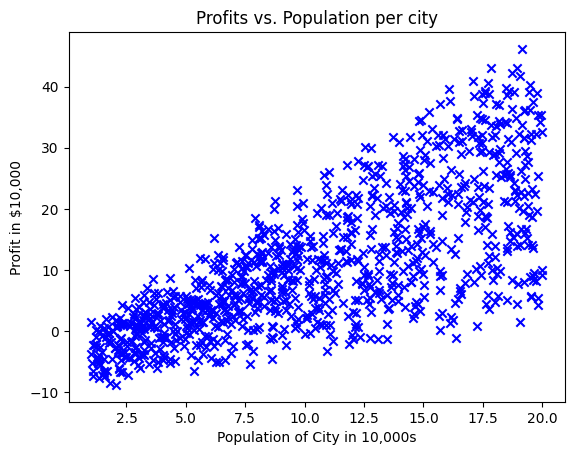

In [8]:
# plotting data using matplotlib
plt.scatter(x_train , y_train , marker="x" , c="b")
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

**Our goal is to build a linear regression model to fit this data. With this model, we can then input a new city's population and have the model estimate our restaurant's potential monthly profits for that city.**


<a name="4"></a>
## 4 - Refresher on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**.
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

`compute_cost()` function  cost $J(w,b)$.

<a name="ex01"></a>
### part  1

The `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator



In [9]:
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b):
    # Step 1: Get the number of training examples (length of x)  it can be y also beacuse both are same
    m = len(x)

    # Step 2: Initialize the total cost to 0
    total_cost = 0;

    # Step 3: Create a placeholder for predictions (though not needed for this example)
    f_wb = np.zeros(m)

    # Step 4: Iterate over each training example
    for i in range(m):
        # Step 4.1: Calculate the prediction for the i-th example
        f_wb[i] = w * x[i] + b

        # Step 4.2: Compute the squared error (cost) for the i-th example
        cost = (f_wb[i] - y[i]) ** 2  # now cost is sinle numbers its run untill m

        # Step 4.3: Accumulate the cost to total_cost
        total_cost += cost

    # Step 5: Compute the final cost by averaging the total cost
    final_cost = (1 / (2 * m)) * total_cost

    # Step 6: Return the final cost value

    return final_cost


### Step 4.2: Compute Squared Error (Cost)
cost = (f_wb[i] - y[i]) ** 2

This computes the squared error for the \(i\)-th example. Assuming

\[
y = [3, 4, 8]
\]

#### For \(i = 0\):
\[
\text{cost} = (3.0 - 3)^2 = 0^2 = 0
\]

#### For \(i = 1\):
\[
\text{cost} = (5.0 - 4)^2 = 1^2 = 1
\]

#### For \(i = 2\):
\[
\text{cost} = (7.0 - 8)^2 = (-1)^2 = 1
\]

### Step 4.3: Accumulate Total Cost

Accumulating costs:
- After first iteration:
  \[
  \text{total\_cost} = 0
  \]
- After second iteration:
  \[
  \text{total\_cost} = 0 + 1 = 1
  \]
- After third iteration:
  \[
  \text{total\_cost} = 1 + 1 = 2
  \]

### Step 6: Compute Final Cost

Using the formula:
\[
\text{final\_cost} = \frac{1}{2m} \times \text{total\_cost}
\]

Where \(m = 3\):
\[
\text{final\_cost} = \frac{1}{2 \times 3} \times 2 = \frac{1}{6} \times 2 = \frac{1}{3} \approx 0.333
\]


In [10]:
initial_w = 2
initial_b = 1

final_cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f"The cost function for all sum for J(w , b) =  is: {final_cost}")

The cost function for all sum for J(w , b) =  is: 92.84021840778527


In [11]:
import numpy as np

def compute_costallCase(x, y, w, b):
    # Step 1: Get the number of training examples (length of x)
    m = len(x)

    # Step 2: Initialize the total cost to 0
    total_cost = 0

    # Step 3: Create a placeholder for predictions (though not needed for this example)
    f_wb = np.zeros(m)

    # Step 4: Iterate over each training example
    for i in range(m):
        # Step 4.1: Calculate the prediction for the i-th example
        f_wb = w * x[i] + b

        # Print the current values for debugging
        print(f"Example {i}:")
        print(f"  x[i] = {x[i]}")
        print(f"  y[i] = {y[i]}")
        print(f"  Prediction (f_wb) = {f_wb}")

        # Step 4.2: Compute the squared error (cost) for the i-th example
        cost = (f_wb - y[i]) ** 2

        # Print the cost for the current example
        print(f"  Cost for this example = {cost}")

        # Step 4.3: Accumulate the cost to total_cost
        total_cost += cost

    # Step 5: Compute the final cost by averaging the total cost
    final_cost = (1 / (2 * m)) * total_cost

    # Print the final cost
    print(f"Final Cost = {final_cost}")

    # Step 6: Return the final cost value
    return final_cost


In [12]:
initial_w = 2
initial_b = 1

final_cost = compute_costallCase(x_train, y_train, initial_w, initial_b)
print(f"The cost function for J(w , b) =  is: {final_cost}")

Example 0:
  x[i] = 11.427456574619171
  y[i] = 11.14877067769102
  Prediction (f_wb) = 23.854913149238342
  Cost for this example = 161.44605650725867
Example 1:
  x[i] = 14.58859796107597
  y[i] = 2.82708954071441
  Prediction (f_wb) = 30.17719592215194
  Cost for this example = 748.02831907595
Example 2:
  x[i] = 12.452504145361234
  y[i] = 12.845147525526926
  Prediction (f_wb) = 25.905008290722467
  Cost for this example = 170.55996320629387
Example 3:
  x[i] = 11.35278047694104
  y[i] = 19.264213688117547
  Prediction (f_wb) = 23.70556095388208
  Cost for this example = 19.725565535114104
Example 4:
  x[i] = 9.04944118743919
  y[i] = -0.7298034027966533
  Prediction (f_wb) = 19.09888237487838
  Cost for this example = 393.17677966977215
Example 5:
  x[i] = 13.271988148266466
  y[i] = 26.952943385108263
  Prediction (f_wb) = 27.543976296532932
  Cost for this example = 0.34931990238712096
Example 6:
  x[i] = 9.314157013991158
  y[i] = 8.572478310772983
  Prediction (f_wb) = 19.628

<a name="6"></a>
## 6 - Gradient descent

In this section, you will implement the gradient for parameters $w, b$ for linear regression.

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


I will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$


<a name="ex02"></a>
### part 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The gradient for the parameters $w, b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator



In [13]:
def compute_gradient(x, y, w, b):
  # Number of training examples
    m = x.shape[0]

    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    dj_dw_sum = 0
    dj_db_sum = 0
    f_wb = np.zeros(m)
    for i in range(m):
      f_wb[i] = w * x[i] + b
      dj_dw_i = (f_wb[i] - y[i]) * x[i]
      dj_db_i = (f_wb[i] - y[i])
      dj_dw_sum+=dj_dw_i
      dj_db_sum+=dj_db_i

    dj_dw = (1 / m) * dj_dw_sum
    dj_db = (1 / m) * dj_db_sum

    return dj_dw , dj_db

In [14]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -160.06027743595615 -10.835735652448331


In [15]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -130.15291321528122 -8.55123382183556


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [16]:
def gradient_descent(x , y , w , b , compute_cost , compute_gradient , alpha , nums_iteration):
  m = len(x)
  cost_history = []
  w_hisory = []


  for i in range(nums_iteration):
    dj_dw , dj_db = compute_gradient(x, y, w, b)

    temp_w = w - alpha * dj_dw
    temp_b = b - alpha * dj_db

    w = temp_w
    b = temp_b

    if(i < 1000000):
      cost = compute_cost(x,y,w,b)
      cost_history.append(cost)


    if (i % math.ceil(nums_iteration / 10) == 0):
      w_hisory.append(w)
      current_cost = cost_history[-1]  # Get the latest cost
      print("Iteration", i, ": Cost", float(current_cost))

  return w , b , cost_history , w_hisory

In [17]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

rw,rb,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", rw, rb)

Iteration 0 : Cost 46.86984302809962
Iteration 150 : Cost 30.723204098270582
Iteration 300 : Cost 29.940512163017196
Iteration 450 : Cost 29.533729573181212
Iteration 600 : Cost 29.322315518761314
Iteration 750 : Cost 29.212438883125863
Iteration 900 : Cost 29.155333526096957
Iteration 1050 : Cost 29.12565458860011
Iteration 1200 : Cost 29.11022977774566
Iteration 1350 : Cost 29.10221315687031
w,b found by gradient descent: 1.53054734831498 -5.072107615896592


As you can see, my cost function is approximately 29.something, but I aim to find the optimal values for but If increasing the learning rate
𝛼
α above 0.01 leads to overshooting, it's best to keep it at 0.01 for stable convergence.
𝑤
w and
𝑏
b. Therefore, we need to update our code once again to achieve this.

In [18]:
print(f" Now our W is {rw}  and b is {rb}")

 Now our W is 1.53054734831498  and b is -5.072107615896592


We will now use the final parameters from gradient descent to plot the linear fit.

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$.

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [19]:
w = rw
b = rb

In [20]:
print(f"The final W is {w} and  b is {b}")

The final W is 1.53054734831498 and  b is -5.072107615896592


The equation you provided is a standard representation of a linear model, often referred to as the linear regression equation:

\[
\{y} = wx + b
\]

Where:
- \( \hat{y} \) is the predicted value.
- \( w \) is the weight (slope) of the line.
- \( x \) is the input feature.
- \( b \) is the bias (y-intercept).

### Explanation:
- **Weight (\( w \))**: Determines the steepness of the line. A larger value means a steeper incline.
- **Bias (\( b \))**: Shifts the line up or down on the y-axis.

This model predicts \( \hat{y} \) based on a linear combination of the input feature \( x \). Would you like to see a plot using specific values for \( w \) and \( b \)? If so, please provide those values!

In [21]:
# here predicated is also y_hat

def final_prediaction(x , w , b):
   m = len(x_train)
   y_hat = np.zeros(m)
   for i in range(m):
     y_hat[i] = w * x[i]  + b
   return y_hat

In [22]:
 y_hat = final_prediaction(x_train , w , b)

Now it’s time to visualize how well our model fits the data. This step is crucial for understanding the effectiveness of our predictions. By plotting the predicted values against the actual data points, we can assess whether our model captures the underlying trends accurately. Let's take a look at the results and evaluate the performance of our model.



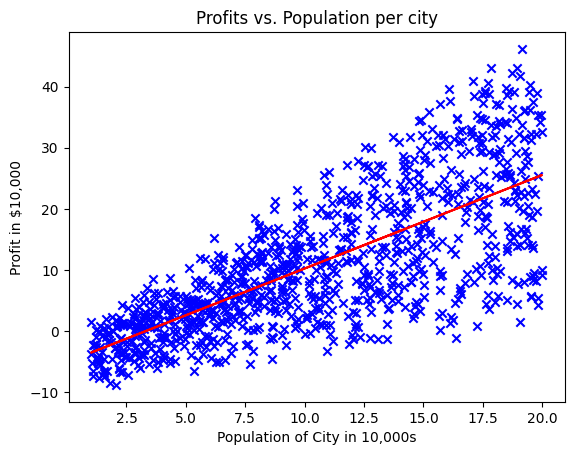

In [23]:
plt.plot(x_train , y_hat , c ='r')
# plotting data using matplotlib
plt.scatter(x_train , y_train , marker="x" , c="b")
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

**Seaborn default visualization let's see how close are these**

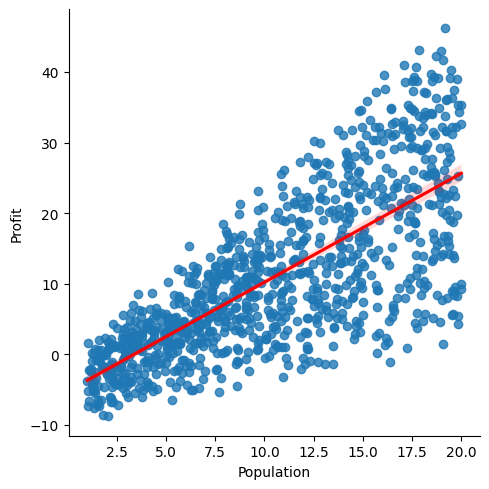

In [24]:
sns.lmplot(x= 'Population' , y = 'Profit' , data = city_profit_data_df , line_kws={'color': 'red'})

**Yes its same**

**Upon analyzing the scatter plot of profits versus the population per city, we observe a clear upward trend. The red line representing our model's predictions closely follows the general direction of the blue data points, indicating a positive correlation between population size and profits. This suggests that, generally, cities with larger populations tend to have higher profits.**

However, while the model captures the overall trend effectively, there is some variability in the data. Many points are scattered around the red line, showing that there are instances where the actual profits differ significantly from the predictions. This variability suggests that although the model is a good starting point, there may be other factors influencing profits that are not captured in this simple linear model. Overall, the fit is reasonable, but further refinement or additional variables may enhance the model's accuracy.

My final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

- The model takes in population of a city in 10,000s as input.

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [25]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $2848.08
For population = 70,000, we predict a profit of $56417.24


Taking User Input for Profit Prediction

In [26]:
with open('model_params.py', 'w') as f:
    f.write(f'w = {w}\n')
    f.write(f'b = {b}\n')
